# Exploratery Data Analysis

Import the necessary libs

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset and 'Order Date' is parsed as datetime when reading the CSV

In [5]:
asd = pd.read_csv("assets/cleaned_dataset.csv", parse_dates=["Order Date"])

Sales Metrics

In [6]:

def calculate_sales_metrics(data):
    total_revenue = data["Total Revenue"].sum()
    total_profit = data["Total Profit"].sum()
    total_units_sold = data["Units Sold"].sum()
    average_order_value = data["Average Order Value (AOV)"].mean()
    profit_margin = data["Profit Margin"].mean()

    return (
        total_revenue,
        total_profit,
        total_units_sold,
        average_order_value,
        profit_margin,
    )
    
calculate_sales_metrics(asd)

(137348768.31,
 44168198.39999999,
 512871,
 13734.876830999998,
 36.21162285657073)

Regional and Country Performance

In [7]:

def regional_and_country_performance(data):
    region_performance = (
        data.groupby("Region")["Total Revenue"]
        .sum()
        .sort_values(ascending=False)
        .head(3)
    )
    country_performance = (
        data.groupby("Country")["Total Profit"]
        .sum()
        .sort_values(ascending=False)
        .head(3)
    )

    return region_performance, country_performance

regional_and_country_performance(asd)

(Region
 Sub-Saharan Africa    39672031.43
 Europe                33368932.11
 Asia                  21347091.02
 Name: Total Revenue, dtype: float64,
 Country
 Djibouti    2425317.87
 Myanmar     1802771.70
 Pakistan    1719922.04
 Name: Total Profit, dtype: float64)

Product and Sales Channel Insights

In [8]:

def product_and_sales_channel_insights(data):
    item_performance = (
        data.groupby("Item Type")["Units Sold"]
        .sum()
        .sort_values(ascending=False)
        .head(3)
    )
    sales_channel_revenue = data.groupby("Sales Channel")["Total Revenue"].sum()

    return item_performance, sales_channel_revenue

product_and_sales_channel_insights(asd)

(Item Type
 Cosmetics    83718
 Clothes      71260
 Beverages    56708
 Name: Units Sold, dtype: int64,
 Sales Channel
 Offline    79094809.20
 Online     58253959.11
 Name: Total Revenue, dtype: float64)

Order and Shipping Efficiency

In [9]:


def order_and_shipping_efficiency(data):
    order_priority_revenue = data.groupby("Order Priority")["Total Revenue"].sum()
    average_shipping_time = data["Shipping Time (days)"].mean()

    return order_priority_revenue, average_shipping_time

opr, ast = order_and_shipping_efficiency(asd)

print(opr)
print(f'AST: {ast}')

Order Priority
C    18855063.05
H    48749546.05
L    36628127.46
M    33116031.75
Name: Total Revenue, dtype: float64
AST: 23.36


Sales Trends

In [10]:

def sales_trends(data):
    data["Year-Month"] = data["Order Date"].dt.to_period("M")
    monthly_revenue = data.groupby("Year-Month")["Total Revenue"].sum()
    yearly_revenue = data.groupby(data["Order Date"].dt.year)["Total Revenue"].sum()

    monthly_growth_rate = monthly_revenue.pct_change().fillna(0) * 100
    yearly_growth_rate = yearly_revenue.pct_change().fillna(0) * 100

    return (
        monthly_revenue,
        yearly_revenue,
        monthly_growth_rate.mean(),
        yearly_growth_rate.mean(),
    )
    
sales_trends(asd)

(Year-Month
 2010-02    3410661.12
 2010-05    2587973.26
 2010-06    1082418.40
 2010-10    6064933.75
 2010-11    3458252.00
 2010-12    2581786.39
 2011-01    1042225.35
 2011-02     387002.20
 2011-04    2798046.49
 2011-05     272410.45
 2011-06      19103.44
 2011-07      97040.64
 2011-09     574951.92
 2011-11    5938385.58
 2012-01    1012884.00
 2012-02    6707849.42
 2012-03     994765.42
 2012-04    4556012.38
 2012-05    3782781.82
 2012-06    2132075.27
 2012-07    4445093.92
 2012-08     576782.80
 2012-09    4648152.72
 2012-10    3042246.77
 2013-02    3296425.02
 2013-03     835759.10
 2013-04    3262562.10
 2013-06    1352867.40
 2013-07    8545511.20
 2013-08      89623.98
 2013-09      71253.21
 2013-10    2702770.40
 2013-12     173676.25
 2014-02    1819660.25
 2014-04    4510578.10
 2014-05    3060338.59
 2014-06      75591.66
 2014-07     688641.85
 2014-08     455479.04
 2014-09      20404.71
 2014-10    1352370.65
 2014-11    4647149.58
 2015-01    5513227.50

Visualizations

In [11]:
def create_visualizations(
    region_performance,
    country_performance,
    item_performance,
    sales_channel_revenue,
    order_priority_revenue,
    monthly_revenue,
    yearly_revenue,
):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=region_performance.index, y=region_performance.values)
    plt.title("Top 3 Regions by Revenue")
    plt.xlabel("Region")
    plt.ylabel("Revenue")
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=country_performance.index, y=country_performance.values)
    plt.title("Top 3 Countries by Profit")
    plt.xlabel("Country")
    plt.ylabel("Profit")
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=item_performance.index, y=item_performance.values)
    plt.title("Best Selling Item Types")
    plt.xlabel("Item Type")
    plt.ylabel("Units Sold")
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=sales_channel_revenue.index, y=sales_channel_revenue.values)
    plt.title("Revenue by Sales Channel")
    plt.xlabel("Sales Channel")
    plt.ylabel("Revenue")
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=order_priority_revenue.index, y=order_priority_revenue.values)
    plt.title("Order Priority Impact on Revenue")
    plt.xlabel("Order Priority")
    plt.ylabel("Revenue")
    plt.show()

    plt.figure(figsize=(12, 6))
    monthly_revenue.plot()
    plt.title("Monthly Sales Trends")
    plt.xlabel("Year-Month")
    plt.ylabel("Revenue")
    plt.show()

    plt.figure(figsize=(12, 6))
    yearly_revenue.plot()
    plt.title("Yearly Sales Trends")
    plt.xlabel("Year")
    plt.ylabel("Revenue")
    plt.show()
    
    plt.figure(figsize=(12, 6))
    max_monthly_sales = monthly_revenue.max()
    min_monthly_sales = monthly_revenue.min()
    sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
    plt.axhline(y=max_monthly_sales, color='r', linestyle='--', label=f'Highest: {max_monthly_sales}')
    plt.axhline(y=min_monthly_sales, color='b', linestyle='--', label=f'Lowest: {min_monthly_sales}')
    plt.legend()
    plt.title("Monthly Sales with Highest and Lowest Points")
    plt.xlabel("Year-Month")
    plt.ylabel("Revenue")
    plt.show()

    plt.figure(figsize=(12, 6))
    max_yearly_sales = yearly_revenue.max()
    min_yearly_sales = yearly_revenue.min()
    sns.barplot(x=yearly_revenue.index, y=yearly_revenue.values)
    plt.axhline(y=max_yearly_sales, color='r', linestyle='--', label=f'Highest: {max_yearly_sales}')
    plt.axhline(y=min_yearly_sales, color='b', linestyle='--', label=f'Lowest: {min_yearly_sales}')
    plt.legend()
    plt.title("Yearly Sales with Highest and Lowest Points")
    plt.xlabel("Year")
    plt.ylabel("Revenue")
    plt.show()

Main function

In [12]:
def main():
    region_performance, country_performance = regional_and_country_performance(asd)
    item_performance, sales_channel_revenue = product_and_sales_channel_insights(asd)
    order_priority_revenue, average_shipping_time = order_and_shipping_efficiency(asd)
    monthly_revenue, yearly_revenue, monthly_growth_rate, yearly_growth_rate = (
        sales_trends(asd)
    )

    create_visualizations(
        region_performance,
        country_performance,
        item_performance,
        sales_channel_revenue,
        order_priority_revenue,
        monthly_revenue,
        yearly_revenue,
    )

Run the main function

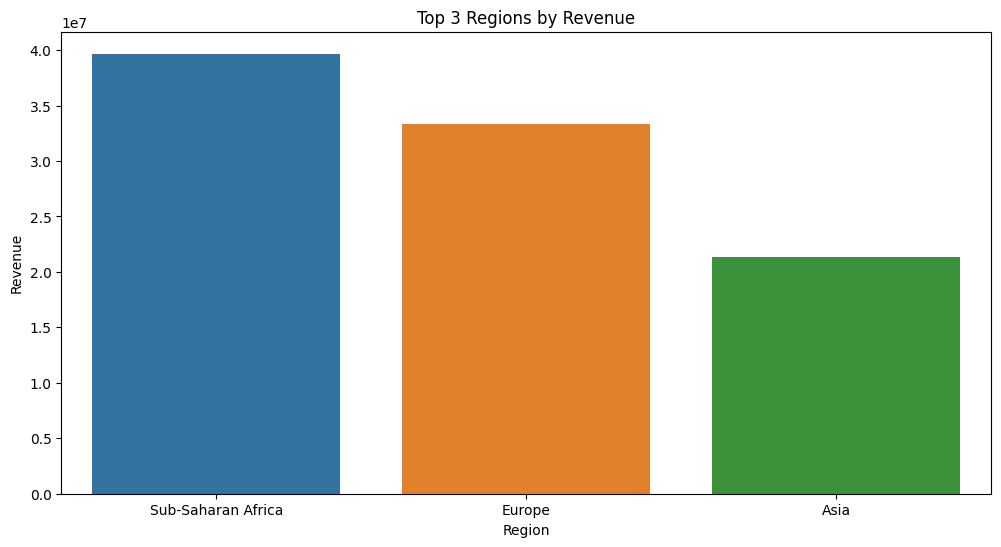

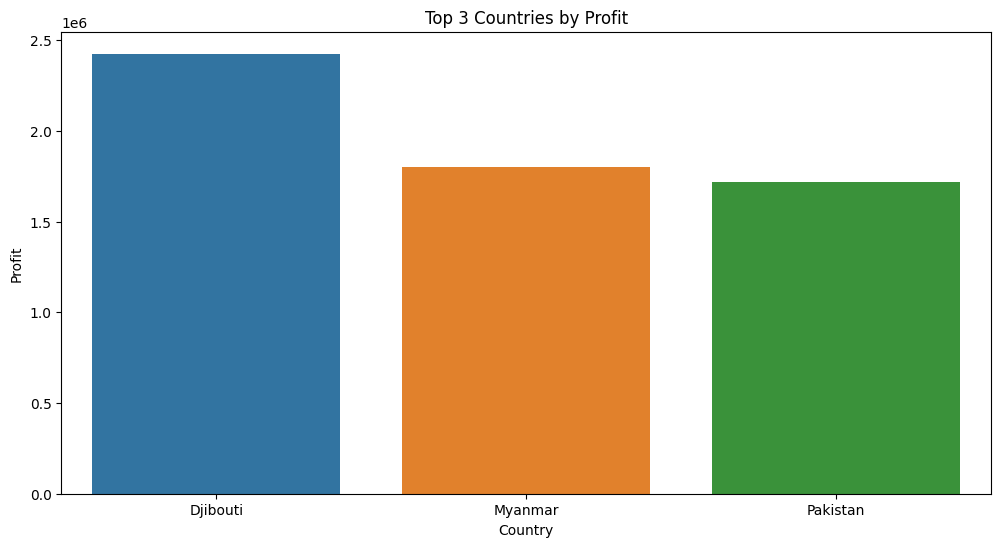

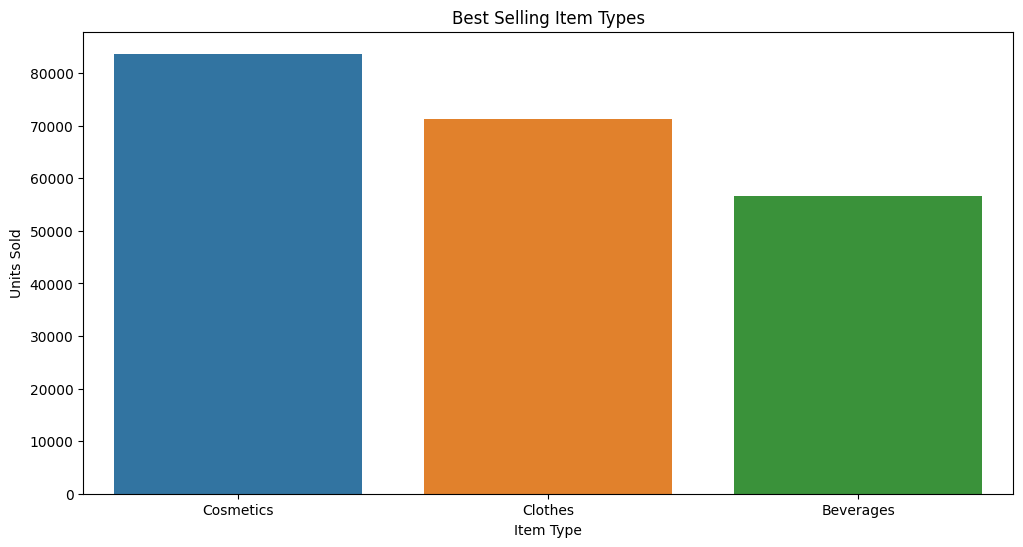

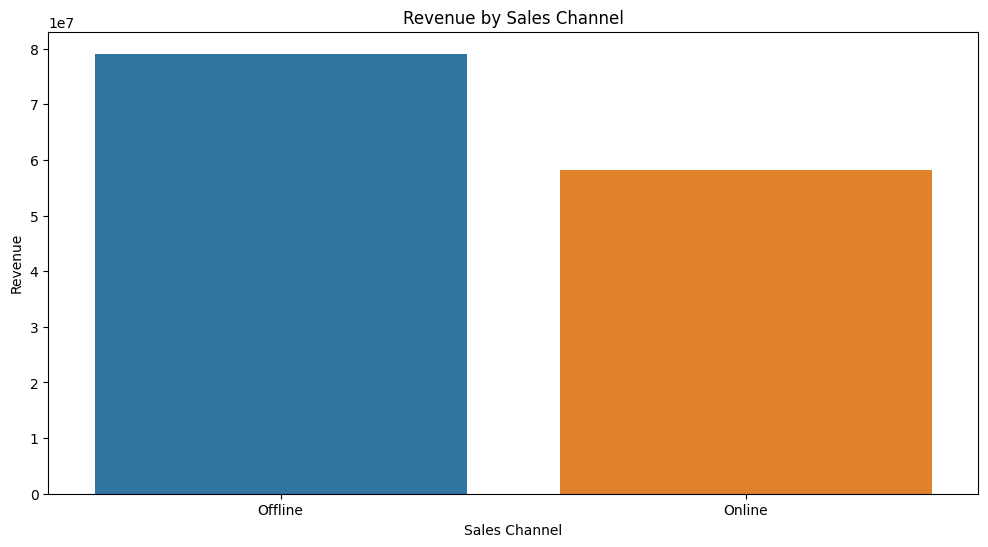

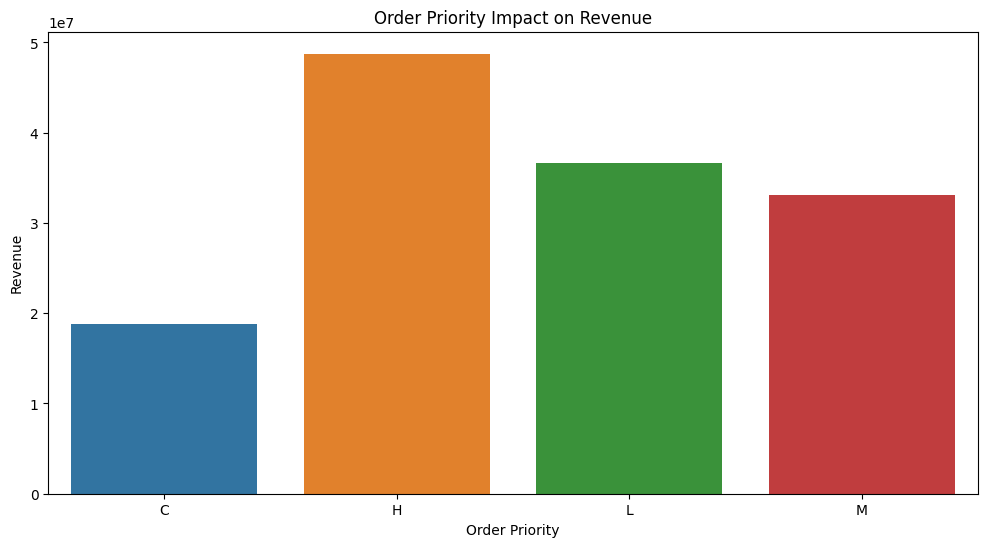

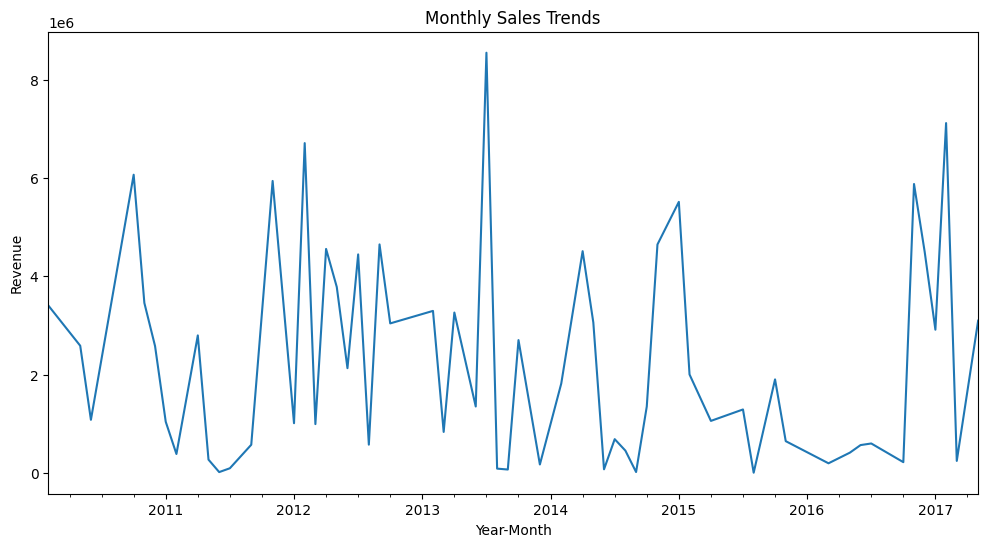

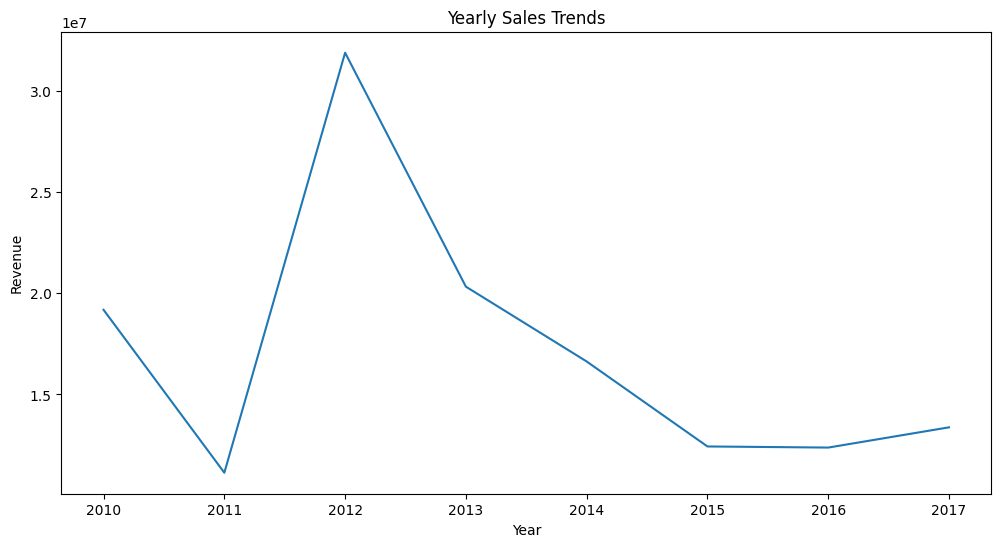

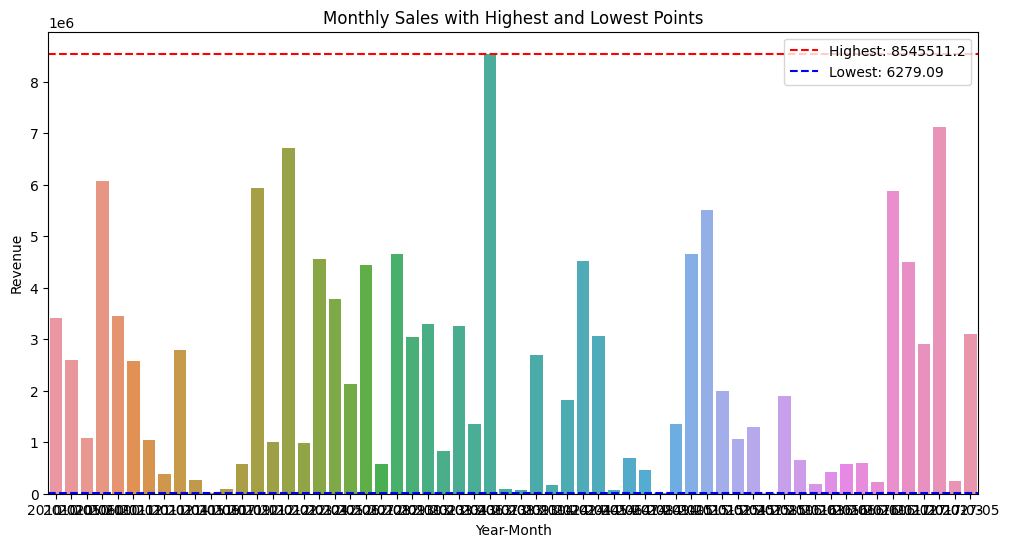

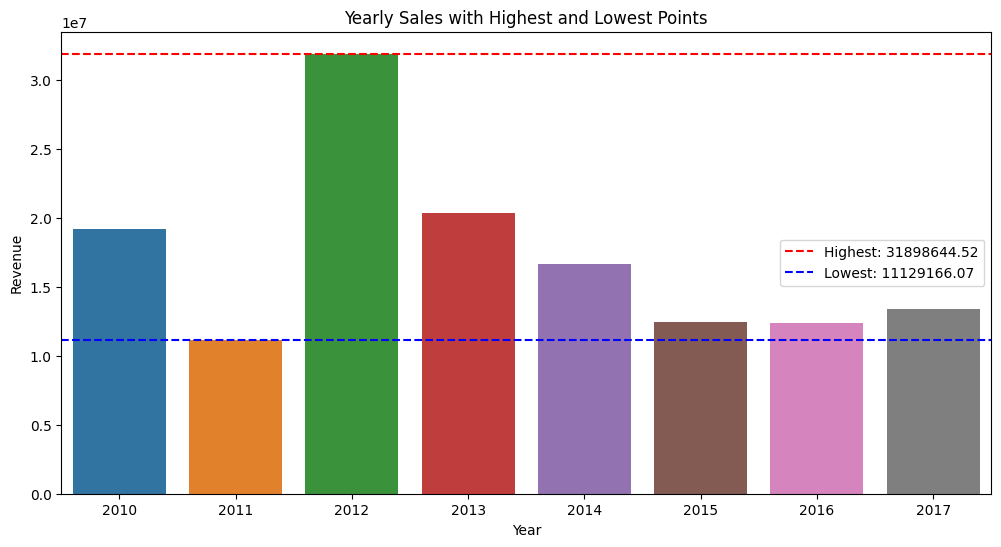

In [13]:
main()